R
[[ 49.77777778  49.77777778  80.77777778   2.11111111   2.33333333
   17.        ]
 [ 49.77777778  49.77777778  80.77777778   2.11111111   2.33333333
   17.        ]
 [ 80.77777778  80.77777778 174.98888889   5.2          4.88888889
   37.63333333]
 [  2.11111111   2.11111111   5.2          0.62222222   0.
    1.26666667]
 [  2.33333333   2.33333333   4.88888889   0.           0.66666667
    0.55555556]
 [ 17.          17.          37.63333333   1.26666667   0.55555556
   11.56666667]]
Rxx
[[ 49.77777778  49.77777778  80.77777778]
 [ 49.77777778  49.77777778  80.77777778]
 [ 80.77777778  80.77777778 174.98888889]]
Ryy
[[ 0.62222222  0.          1.26666667]
 [ 0.          0.66666667  0.55555556]
 [ 1.26666667  0.55555556 11.56666667]]
Rxy
[[ 2.11111111  2.33333333 17.        ]
 [ 2.11111111  2.33333333 17.        ]
 [ 5.2         4.88888889 37.63333333]]
Ryx
[[ 2.11111111  2.11111111  5.2       ]
 [ 2.33333333  2.33333333  4.88888889]
 [17.         17.         37.63333333]]
Rx
[[-9.49

/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_3978/1203333479.py:53: ComplexWarning: Casting complex values to real discards the imaginary part
  AS[i] =   v[0][0]*X1[i]+v[1][0]*X2[i] + v[2][0]*X3[i]
/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_3978/1203333479.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  EA[i] =   v[0][0]*Y1[i]+v[1][0]*Y2[i]+v[2][0]*Y3[i]


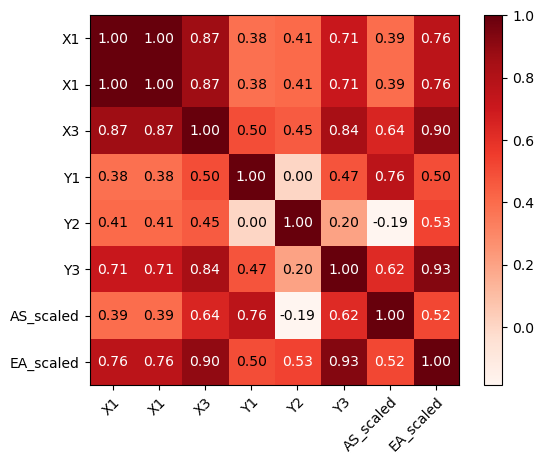

In [3]:
#canonical correlation:

import numpy as np
# Academic Performance (X)
X1 = [85, 78, 92, 88, 94, 96, 100, 85, 92, 80]  # Math scores
X2 = [70, 75, 78, 72, 80, 82, 90, 75, 88, 72]  # English scores
X3 = [75, 85, 90, 82, 105, 102, 115, 85, 95, 75]  # Science scores

# Extracurricular Activities (Y)
Y1 = [2, 3, 2, 3, 2, 3, 4, 3, 4, 2]  # Sports participation hours per X3eek
Y2 = [1, 2, 2, 3, 3, 3, 2, 2, 1, 1]  # Music club involvement hours per X3eek
Y3 = [5, 6, 8, 4, 10, 12, 15, 11, 9, 7]  # Leadership roles in school clubs (hours per X3eek)

All = np.array([X1,X1,X3,Y1,Y2,Y3])
R = np.cov(All)
print('R')
print(R)
Rxx = R[0:3,0:3]
Ryy = R[3:6,3:6]
Rxy=R[0:3,3:6]
Ryx=Rxy.T


print('Rxx')
print(Rxx)
print('Ryy')
print(Ryy)
print('Rxy')
print(Rxy)
print('Ryx')
print(Ryx)




# Rx matrix for the for the blood pressure 
Rxx_inv=(np.linalg.inv(Rxx))
Ryy_inv=np.linalg.inv(Ryy)
A=np.matmul(Rxx_inv,Rxy)
B=np.matmul(Ryy_inv,Ryx)
Rx=np.matmul(A,B)
print('Rx')
print(Rx)
# eigen values and vectors for the blood pressure 

from numpy.linalg import eig
w,v=eig(Rx)
print('E-value:', w)
print('E-vector', v)
#BP equation:
AS = np.zeros((len(X1)))
for i in range(len(X1)):
    AS[i] =   v[0][0]*X1[i]+v[1][0]*X2[i] + v[2][0]*X3[i]
print('AS Equation')
print(v[0][0],v[1][0],v[2][0])
print('AS values')
print(AS)
#body shape
# Rx matrix for the for the body shape
A=np.matmul(Ryy_inv,Ryx)
B=np.matmul(Rxx_inv,Rxy)
rx=np.matmul(A,B)
# eigen values and vectors for the body shape
print('Rx')
print(rx)
w,v=eig(rx)
print('E-value:', w)
print('E-vector', v)
#BP equation:
EA = np.zeros((len(Y1)))
for i in range(len(Y1)):
    EA[i] =   v[0][0]*Y1[i]+v[1][0]*Y2[i]+v[2][0]*Y3[i]

print('EA equation')
print(v[0][0],v[1][0],v[2][0])

print('EA values')
print(EA)
#standardized scores
# canonical loadings and cross loadings 



import scipy.stats
scipy.stats.pearsonr(AS,EA)
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

# standardization of AS
AS_scaled = scale.fit_transform(AS.reshape(-1, 1)) 
print('AS_scaled')
print(AS_scaled)

# standardization of EA
EA_scaled = scale.fit_transform(EA.reshape(-1, 1))
print('EA_scaled') 
print(EA_scaled)

print('pearosn')
print('AS_scale,spp')
print(scipy.stats.pearsonr(AS_scaled.squeeze(), X1))



#plot the heat map 
import numpy as np
from mlxtend.plotting import heatmap
import matplotlib.pyplot as plt
data=np.zeros((len(X1),8)) 
data[:,0]=X1;
data[:,1]=X1; 
data[:,2]=X3;
data[:,3]=Y1; 
data[:,4]=Y2; 
data[:,5]=Y3 ; 
data[:,6]=AS_scaled.squeeze(); 
data[:,7]=EA_scaled.squeeze()
cols=['X1','X1','X3', 'Y1','Y2','Y3','AS_scaled','EA_scaled']
cm = np.corrcoef(data.T)

hm = heatmap(cm, row_names=cols, column_names=cols,cmap='Reds')

# plt.savefig('images/10_04.png', dpi=300)
plt.show()